# Leaf Clustering

Utilizing [Kaggle data](https://www.kaggle.com/c/leaf-classification/overview) and KMeans to create clusters for leaves images.

## Challenges:
- Deal with numpy arrays
- Reshape images to KMeans algorithm
- Find the best Nº of clusters

In [1]:
# importing required modules 
from zipfile import ZipFile
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import cv2
import os
import glob
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
import warnings
warnings.filterwarnings("ignore") 

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/leaf-classification/train.csv.zip
/kaggle/input/leaf-classification/sample_submission.csv.zip
/kaggle/input/leaf-classification/images.zip
/kaggle/input/leaf-classification/test.csv.zip


In [3]:
# specifying the zip file name 
images_zip = '../input/leaf-classification/images.zip'
  
# opening the zip file in READ mode 
with ZipFile(images_zip, 'r') as zip: 
    # printing all the contents of the zip file 
#     zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

Extracting all the files now...
Done!


In [4]:
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/working/__notebook_source__.ipynb
/kaggle/working/images/268.jpg
/kaggle/working/images/1122.jpg
/kaggle/working/images/145.jpg
/kaggle/working/images/1121.jpg
/kaggle/working/images/467.jpg
/kaggle/working/images/1201.jpg
/kaggle/working/images/104.jpg
/kaggle/working/images/309.jpg
/kaggle/working/images/948.jpg
/kaggle/working/images/1126.jpg
/kaggle/working/images/351.jpg
/kaggle/working/images/565.jpg
/kaggle/working/images/1386.jpg
/kaggle/working/images/828.jpg
/kaggle/working/images/1397.jpg
/kaggle/working/images/947.jpg
/kaggle/working/images/210.jpg
/kaggle/working/images/86.jpg
/kaggle/working/images/1184.jpg
/kaggle/working/images/856.jpg
/kaggle/working/images/1333.jpg
/kaggle/working/images/1379.jpg
/kaggle/working/images/1528.jpg
/kaggle/working/images/247.jpg
/kaggle/working/images/929.jpg
/kaggle/working/images/1543.jpg
/kaggle/working/images/1211.jpg
/kaggle/working/images/665.jpg
/kaggle/working/images/937.jpg
/kaggle/working/images/1478.jpg
/kaggle/working/

In [5]:
path = '/kaggle/working/images/'

In [6]:
def load_data(path,size=96):
    '''
    path: string
    size: int, default = 96'''
    print("Loading data from: ", path)
    data = []
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_resize = cv2.resize(img_array, (size, size))
        data.append([img_resize])
    return data

In [7]:
data =load_data(path,size=96)

Loading data from:  /kaggle/working/images/


In [8]:
!mkdir features

In [9]:
path2 = 'features'

In [10]:
np.save(os.path.join(path2,'features'),np.array(data))

In [11]:
saved = np.load(os.path.join(path2,'features.npy'))

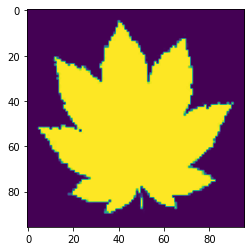

In [12]:
plt.imshow(saved[0].reshape(96, 96,1));

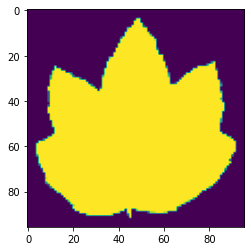

In [13]:
plt.imshow(saved[1583].reshape(96, 96,1));

In [14]:
saved.shape

(1584, 1, 96, 96)

In [15]:
data = saved.copy()

In [16]:
#let's transform the array into [n_images,-1] to be able to use KMeans
data = data.reshape(1584,96*96)

# Otimizing cluster number

In [17]:
min_clusters = 2
max_clusters = 10
inertias = np.zeros(shape= (max_clusters - min_clusters +1,))

In [18]:
for i in range(min_clusters, max_clusters+1):
    km = KMeans(n_clusters= i, random_state=42)
    km.fit(data)
    inertias[i-min_clusters] = km.inertia_

In [19]:
def optimal_number_of_clusters(inertias):
    '''
    Find the optimal number of clusters based on inertias
    '''
    x1, y1 = 2, inertias[0]
    x2, y2 = 20, inertias[len(inertias)-1]

    distances = []
    for i in range(len(inertias)):
        x0 = i+2
        y0 = inertias[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [20]:
n = optimal_number_of_clusters(inertias)
n

9

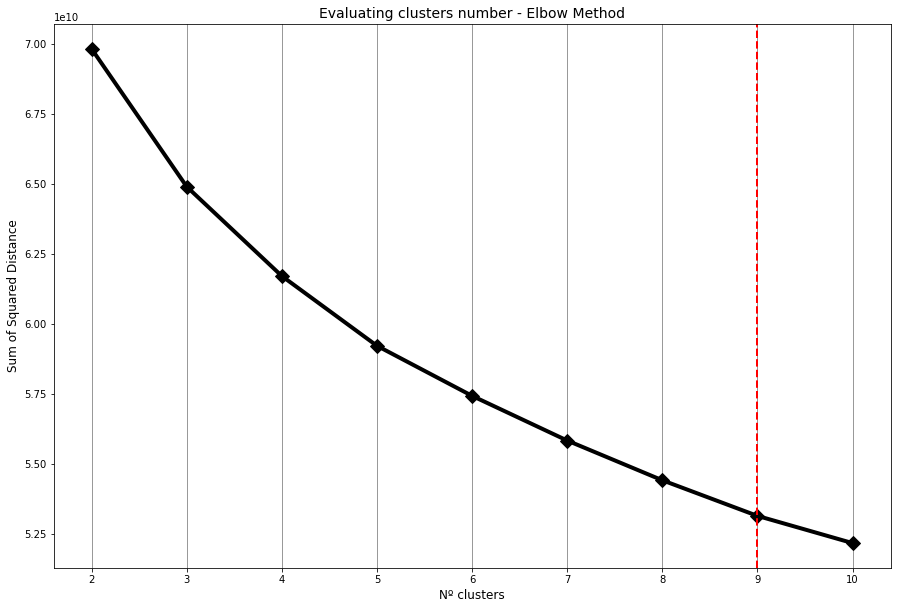

In [21]:
plt.figure(figsize=[15,10])
plt.plot(range(min_clusters,max_clusters+1), inertias, linewidth =4, color= 'black', marker='D', markersize=10)
plt.title("Evaluating clusters number - Elbow Method",  fontsize=14, color='black')
plt.xlabel("Nº clusters",  fontsize=12, color='black')
plt.ylabel("Sum of Squared Distance",  fontsize=12, color='black')
plt.grid(which = 'both',color='black', axis='x', alpha=0.5)
n_clusters = n
plt.axvline(x=n_clusters, linewidth=2, color='red', linestyle='--')

plt.show()

In [22]:
#Fitting and predicting data!
kmeans = KMeans(n_clusters=n, random_state=42)
kmeans.fit(data)
Z = kmeans.predict(data)

cluster 0
50 elements


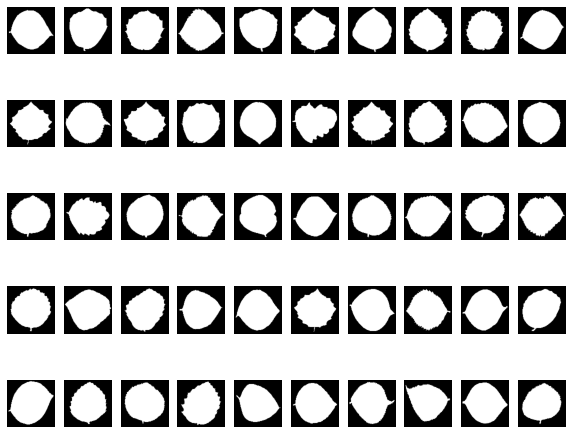

cluster 1
50 elements


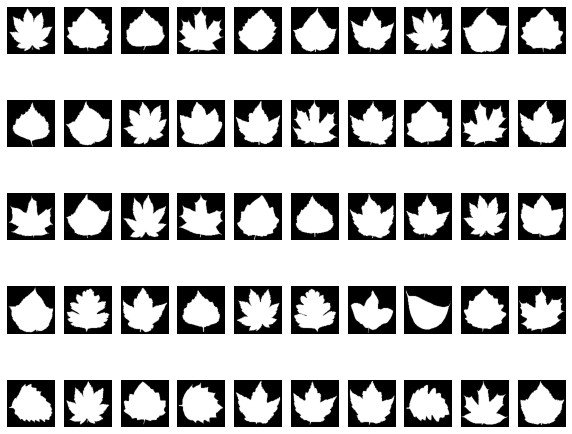

cluster 2
50 elements


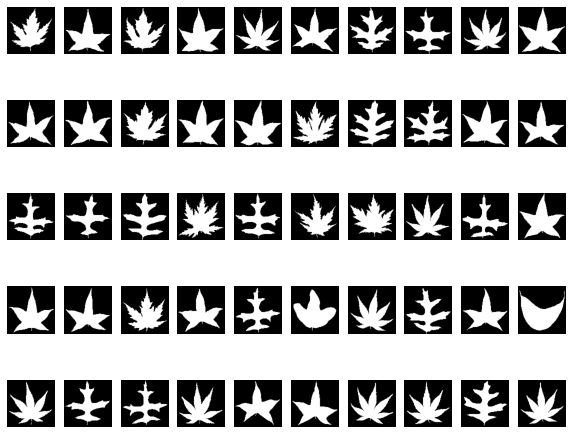

cluster 3
50 elements


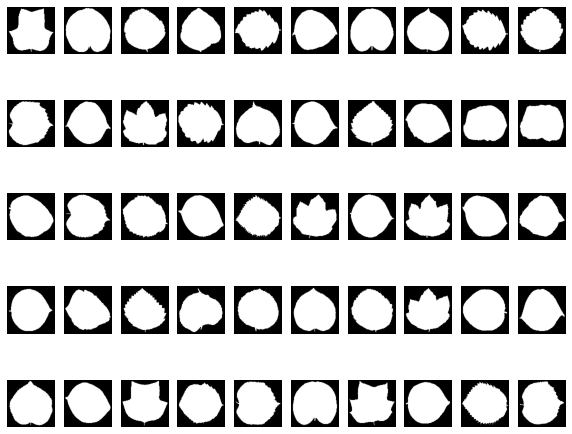

cluster 4
50 elements


In [ ]:
#Plotting 50 images from each cluster
for i in range(n):

    row = np.where(Z==i)[0]  # row in Z for elements of cluster i
    num = 50       #  number of elements for each cluster
    r = np.floor(num/10.)    # number of rows in the figure of the cluster 

    print("cluster "+str(i))
    print(str(num)+" elements")

    plt.figure(figsize=(10,10))
    for k in range(0, num):
        plt.subplot(r+1, 10, k+1)
        image = data[row[k], ]
        image = image.reshape(96, 96)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show();

As we can see there're several clusters with similar characteristics, and and other very distinct